# Sampling
Sample Exalted Orb Data from the whole giant dataset for learning

## Setup

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#setup
import os, sys
current_path = os.path.abspath('')
parent_path = os.path.dirname(current_path)
source_path = f'{parent_path}\\src'
if not source_path in sys.path: sys.path.append(source_path)

#customs
from data_model import *
from data_helper import *
from config import *
setup()

Config finished!


In [ ]:
Constants.__dict__.keys()

dict_keys(['__module__', 'LEAGUES', 'DATA_PATH', 'REDUCED', 'INTERESTING_CURRENCIES', 'IMG_OUTPUT_PATH', 'DPI_OUTPUT', 'SAMPLE_LEAGUE_NAME', '__dict__', '__weakref__', '__doc__'])

## Loading

In [ ]:
print('default: ', Constants.DATA_PATH)
Constants.DATA_PATH = '../data'
print('changed: ', Constants.DATA_PATH)

default:  ./data
changed:  ../data


In [ ]:
DATA = DataHelper.load_all_leagues_data(Constants.DATA_PATH, Constants.LEAGUES)

Loading League Data, league: Essence
Load POE DATA, league specific name: Essence, type: Event
Reading currency!
Reading items!
Load POE DATA, league specific name: Hardcore Essence, type: Event Hardcore
Reading currency!
Reading items!
Load POE DATA, league specific name: Hardcore, type: Hardcore
Reading currency!
Reading items!
Load POE DATA, league specific name: Standard, type: Standard
Reading currency!
Reading items!
Loading League Data, league: Breach
Load POE DATA, league specific name: Breach, type: Event
Reading currency!
Reading items!
Load POE DATA, league specific name: Hardcore Breach, type: Event Hardcore
Reading currency!
Reading items!
Load POE DATA, league specific name: Hardcore, type: Hardcore
Reading currency!
Reading items!
Load POE DATA, league specific name: Standard, type: Standard
Reading currency!
Reading items!
Loading League Data, league: Legacy
Load POE DATA, league specific name: Legacy, type: Event
Reading currency!
Reading items!
Load POE DATA, league s

## NOTE:
**`Here we will be working with exalted orb`**

In [ ]:
NAME = 'Exalted Orb'
full_exalted_data = DataHelper.get_concatinated_currency_data(NAME, DATA)
print('data shape: ', full_exalted_data.shape)
full_exalted_data.head()

data shape:  (1807, 6)


,League,Date,Get,Pay,Value,Confidence
0,Essence,2016-09-08,Exalted Orb,Chaos Orb,64.00417,High
1,Essence,2016-09-09,Exalted Orb,Chaos Orb,64.51451,High
2,Essence,2016-09-10,Exalted Orb,Chaos Orb,65.00280,High
3,Essence,2016-09-11,Exalted Orb,Chaos Orb,65.05764,High
4,Essence,2016-09-12,Exalted Orb,Chaos Orb,65.98811,High


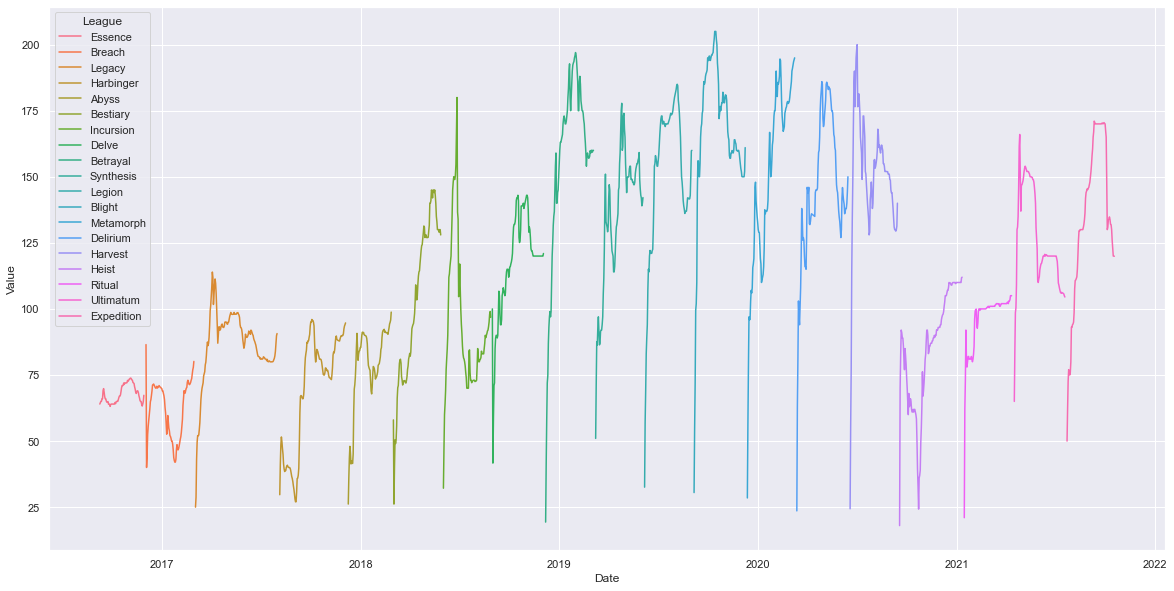

In [ ]:
figure = plt.figure(figsize=(20,10))
ax = figure.add_subplot(1,1,1)
sns.lineplot(data=full_exalted_data,x='Date', y='Value', hue='League')

ylim_low, ylim_high = ax.get_ylim()
plt.show()

## Process

In [ ]:
from sklearn.preprocessing import LabelEncoder
def process(df, name = NAME):
    # quick check pay
    pay_currencies = df['Pay'].unique()
    if len(pay_currencies) != 1 and pay_currencies[0] != 'Chaos Orb': raise TypeError('Pay Currency is not Chaos Orb (medium)')
    
    # quick check get
    get_currencies = df['Get'].unique()
    if len(get_currencies) != 1 and get_currencies[0] != name: raise TypeError('Pay Currency is not Chaos Orb (medium)')

    #engineering
    selected_features = [
        'Date',
        'Value',
        'League', # this could (or not) be useful, but i decide to just keep it
    ]
    df_return = df[selected_features].copy()

    enc = LabelEncoder()
    df_return['Confidence'] = enc.fit_transform(df['Confidence'])
    mapping = dict(zip(enc.classes_,enc.transform(enc.classes_)))
    print('Transformed confidence mapping: ', mapping)
    
    return df_return

df_processed = process(full_exalted_data)
df_processed.head(2)

Transformed confidence mapping:  {'High': 0, 'Low': 1, 'Medium': 2}


,Date,Value,League,Confidence
0,2016-09-08,64.00417,Essence,0
1,2016-09-09,64.51451,Essence,0


In [ ]:
df_processed.apply(lambda x: x.unique())

Date          [2016-09-08T00:00:00.000000000, 2016-09-09T00:...
Value         [64.00417, 64.51451, 65.0028, 65.05764, 65.988...
League        [Essence, Breach, Legacy, Harbinger, Abyss, Be...
Confidence                                            [0, 1, 2]
dtype: object

## Check and cleanup

In [ ]:
# Check null
df_processed.isna().sum(axis=0)

Date          0
Value         0
League        0
Confidence    0
dtype: int64

## Save csv

In [ ]:
OUTPUT_PATH = './data'
df_processed.to_csv(f'{OUTPUT_PATH}/{NAME}.csv', index=False)

In [ ]:
df_processed.shape

(1807, 4)